In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [10]:
# Этап 1
# Загрузка данных
data = pd.read_csv('/Users/matthew/Documents/GitHub/my_masters_degree/data_analysis/homework_3/data.csv')

In [11]:
# Этап 2
# Проверка на пропущенные значения
missing_values = data.isnull().sum()

# Очистка данных
data = data.dropna()

# Выбор данных по акциям компании Apple
apple_data = data[data['symbol'] == 'AAPL']

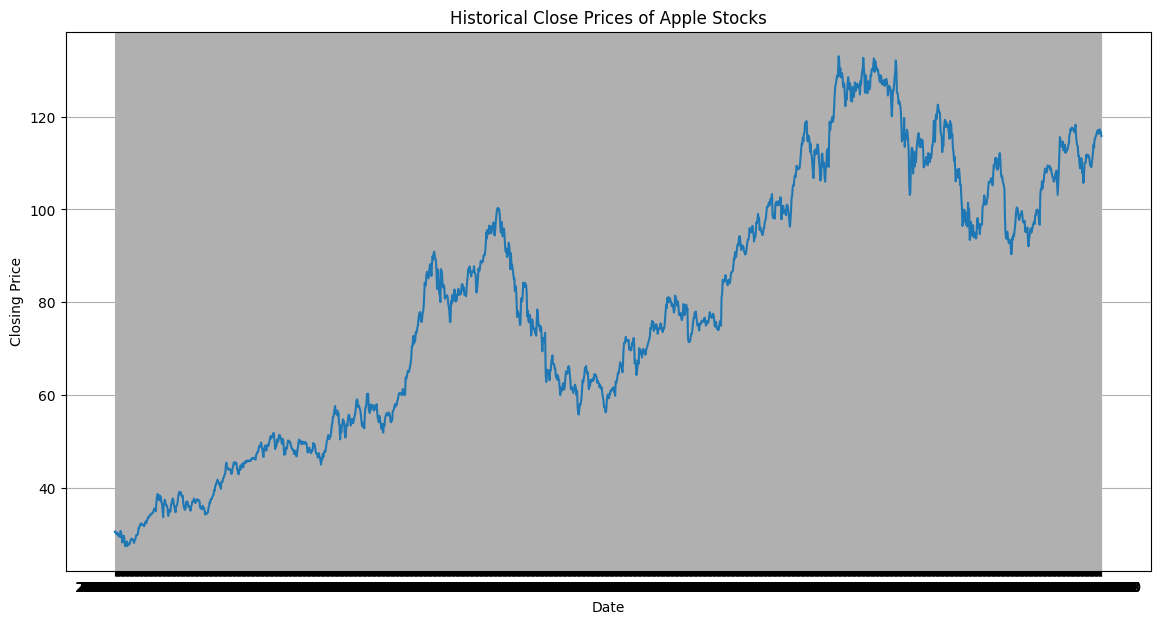

In [12]:
# Этап 3
# Визуализация временного ряда
plt.figure(figsize=(14, 7))
plt.plot(apple_data['date'], apple_data['close'])
plt.title('Historical Close Prices of Apple Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [13]:
# Этап 4
# Проверка на стационарность
result = adfuller(apple_data['close'])
print('ADF статистика:', result[0])
print('P-значение:', result[1])
print('Критические значения:', result[4])
if result[1] < 0.05:
    print('Вывод: Ряд стационарен')
else:
    print('Вывод: Ряд нестационарен')

ADF статистика: -1.324457792009011
P-значение: 0.6179099002369274
Критические значения: {'1%': -3.434068828903083, '5%': -2.8631826560063542, '10%': -2.5676445003500348}
Вывод: Ряд нестационарен


In [14]:
# Этап 5
# Декомпозиция временного ряда
result = seasonal_decompose(apple_data['close'], model='additive', period=1)
trend = result.trend
seasonal = result.seasonal
residual = result.resid

In [21]:
# Этап 6
# Моделирование с помощью ARIMA
model = ARIMA(apple_data['close'], order=(5,1,0))

X, y = apple_data['date'], apple_data['close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_fit = model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
# Этап 7
# Оценка точности и адекватности модели
forecast = model_fit.forecast(steps=10)  # Прогноз на 10 шагов вперед
mse = ((forecast - apple_data['close'].values[-10:]) ** 2).mean()
mae = (abs(forecast - apple_data['close'].values[-10:])).mean()
print('Метрика MSE:', mse)
print('Метрика MAE:', mae)
if mae < 0.05:
    print('Вывод: Модель адекватна')
else:
    print('Вывод: Модель не является адекватной')



Метрика MSE: 0.7486345987478269
Метрика MAE: 0.7573760083687915
Вывод: Модель не является адекватной


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


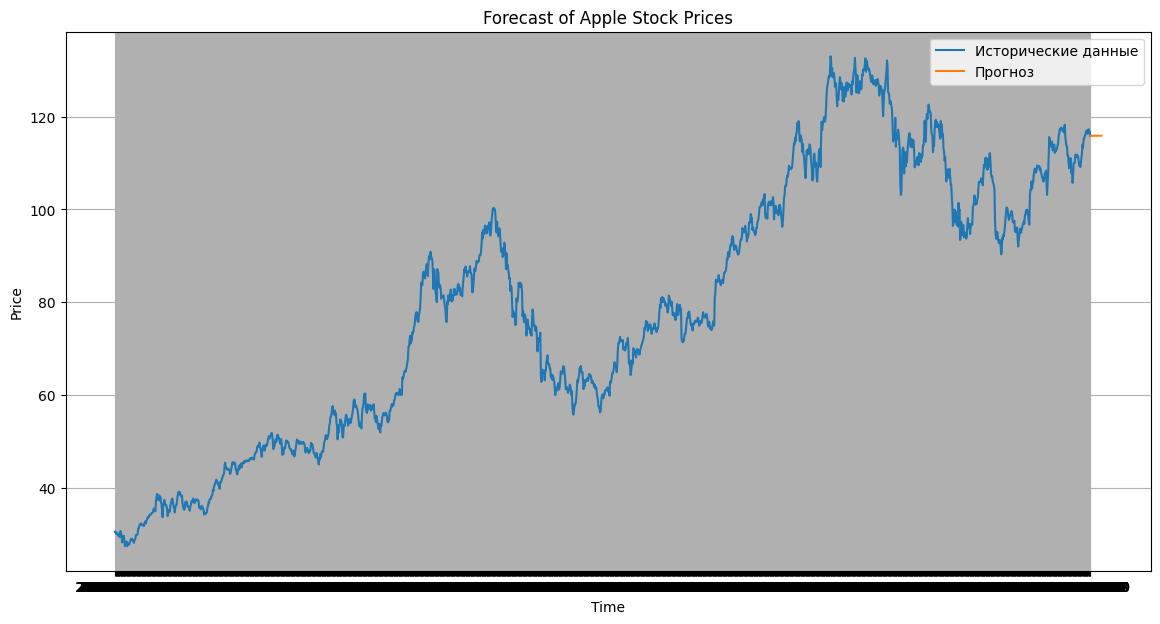

In [24]:
# Этап 8
# Прогнозирование будущих значений
forecast = model_fit.forecast(steps=20)  # Прогноз на 20 шагов вперед

# Визуализация результатов прогноза
plt.figure(figsize=(14, 7))
plt.plot(apple_data['date'], apple_data['close'], label='Исторические данные')
plt.plot(range(len(apple_data), len(apple_data) + 20), forecast, label='Прогноз')
plt.title('Forecast of Apple Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()